In [4]:
pip install --upgrade scikit-learn


In [11]:
import numpy as np                     # Importing NumPy library as np
import pandas as pd                    # Importing Pandas library as pd
import matplotlib.pyplot as plt        # Importing Matplotlib's pyplot module as plt
import seaborn as sns                  # Importing Seaborn library as sns

from sklearn import tree               # Importing tree module from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier from Scikit-Learn's tree module
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier from Scikit-Learn's ensemble module
from sklearn.neural_network import MLPClassifier     # Importing MLPClassifier (Multi-layer Perceptron Classifier) from Scikit-Learn's neural_network module
from sklearn.model_selection import train_test_split # Importing train_test_split from Scikit-Learn's model_selection module
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix  # Importing specific metrics and tools from Scikit-Learn's metrics module
from sklearn.preprocessing import StandardScaler   # Importing StandardScaler from Scikit-Learn's preprocessing module
from sklearn.model_selection import GridSearchCV   # Importing GridSearchCV from Scikit-Learn's model_selection module

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Importing LinearDiscriminantAnalysis from Scikit-Learn's discriminant_analysis module
from sklearn.metrics import confusion_matrix   # Importing confusion_matrix from Scikit-Learn's metrics module
from sklearn.preprocessing import scale        # Importing scale from Scikit-Learn's preprocessing module
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression from Scikit-Learn's linear_model module

In [12]:
df=pd.read_excel('D:/Ment Class/Practise11/Excel Data/TSF/PowerBI/DWNLDS/CV/MRA Project/MRA Project/XLSX File for practice/df.xlsx')

In [13]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


We shall drop the Co_Code & Co_Name columns unless and otherwise we need it for analysis.

Regular EDA.

In [14]:
df.drop(['Co_Code', 'Co_Name'], axis= 1, inplace= True)


In [15]:
df.head(2)

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.21759,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.21736,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _Operating_Expense_Rate                            2058 non-null   float64
 1   _Research_and_development_expense_rate             2058 non-null   float64
 2   _Cash_flow_rate                                    2058 non-null   float64
 3   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 4   _Tax_rate_A                                        2058 non-null   float64
 5   _Cash_Flow_Per_Share                               1891 non-null   float64
 6   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 7   _Realized_Sales_Gross_Profit_Growth_Rate           2058 non-null   float64
 8   _Operating_Profit_Growth_Rate                      2058 non-null   float64
 9   _Continu

In [17]:
df.shape

(2058, 56)

In [18]:
print(df.isnull().sum().sum())


298


In [19]:
df.isnull().sum()


_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

Missing Value or Null Value Treatment.
The median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
col=list(df)
df = pd.DataFrame(imputer.fit_transform(df))
df.columns=col
df.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,...,0.310901,0.034913,0.0,0.028801,0.620927,0.026930,0.565744,1.0,0.015338,0.0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,...,0.314572,0.041653,0.0,0.006191,0.622513,0.026297,0.560741,1.0,0.029445,1.0
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,...,0.314777,0.033560,0.0,0.001095,0.623749,0.027276,0.566744,1.0,0.041718,0.0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,...,0.316974,0.016527,0.0,0.003749,0.622963,0.026988,0.565950,1.0,0.026956,0.0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,...,0.317729,0.034497,0.0,0.006595,0.624419,0.027498,0.567177,1.0,0.019900,0.0


In [21]:
print(df.isnull().sum().sum())


0


In [22]:
df.shape


(2058, 56)

In [23]:
df.duplicated().sum()


0

In [24]:
df.describe()


,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.320039,0.176967,0.022761,0.848108,0.217392,...,0.314629,0.039306,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.014667,0.030157,0.021701,0.004589,0.005679,...,0.012780,0.047818,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.315705,0.166604,0.022058,0.847974,0.217574,...,0.312783,0.021885,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,0.217596,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325387,0.185885,0.022152,0.848115,0.217620,...,0.316546,0.043865,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,0.233205,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


Univariate Analysis

In [26]:
import matplotlib.pyplot as plt        
import seaborn as sns 

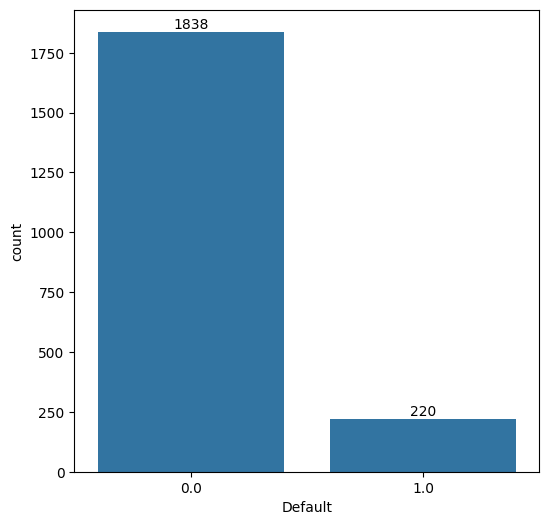

In [27]:
plt.figure(figsize = (6,6))
ax= sns.countplot(x="Default",data=df)
for label in ax.containers:
    ax.bar_label(label)
plt.show();

In [28]:
df['Default'].value_counts()


0.0    1838
1.0     220
Name: Default, dtype: int64

In [29]:
df.Default.sum()/len(df.Default)


0.10689990281827016

Histplot

In [30]:
import matplotlib.pyplot as plt        
import seaborn as sns 

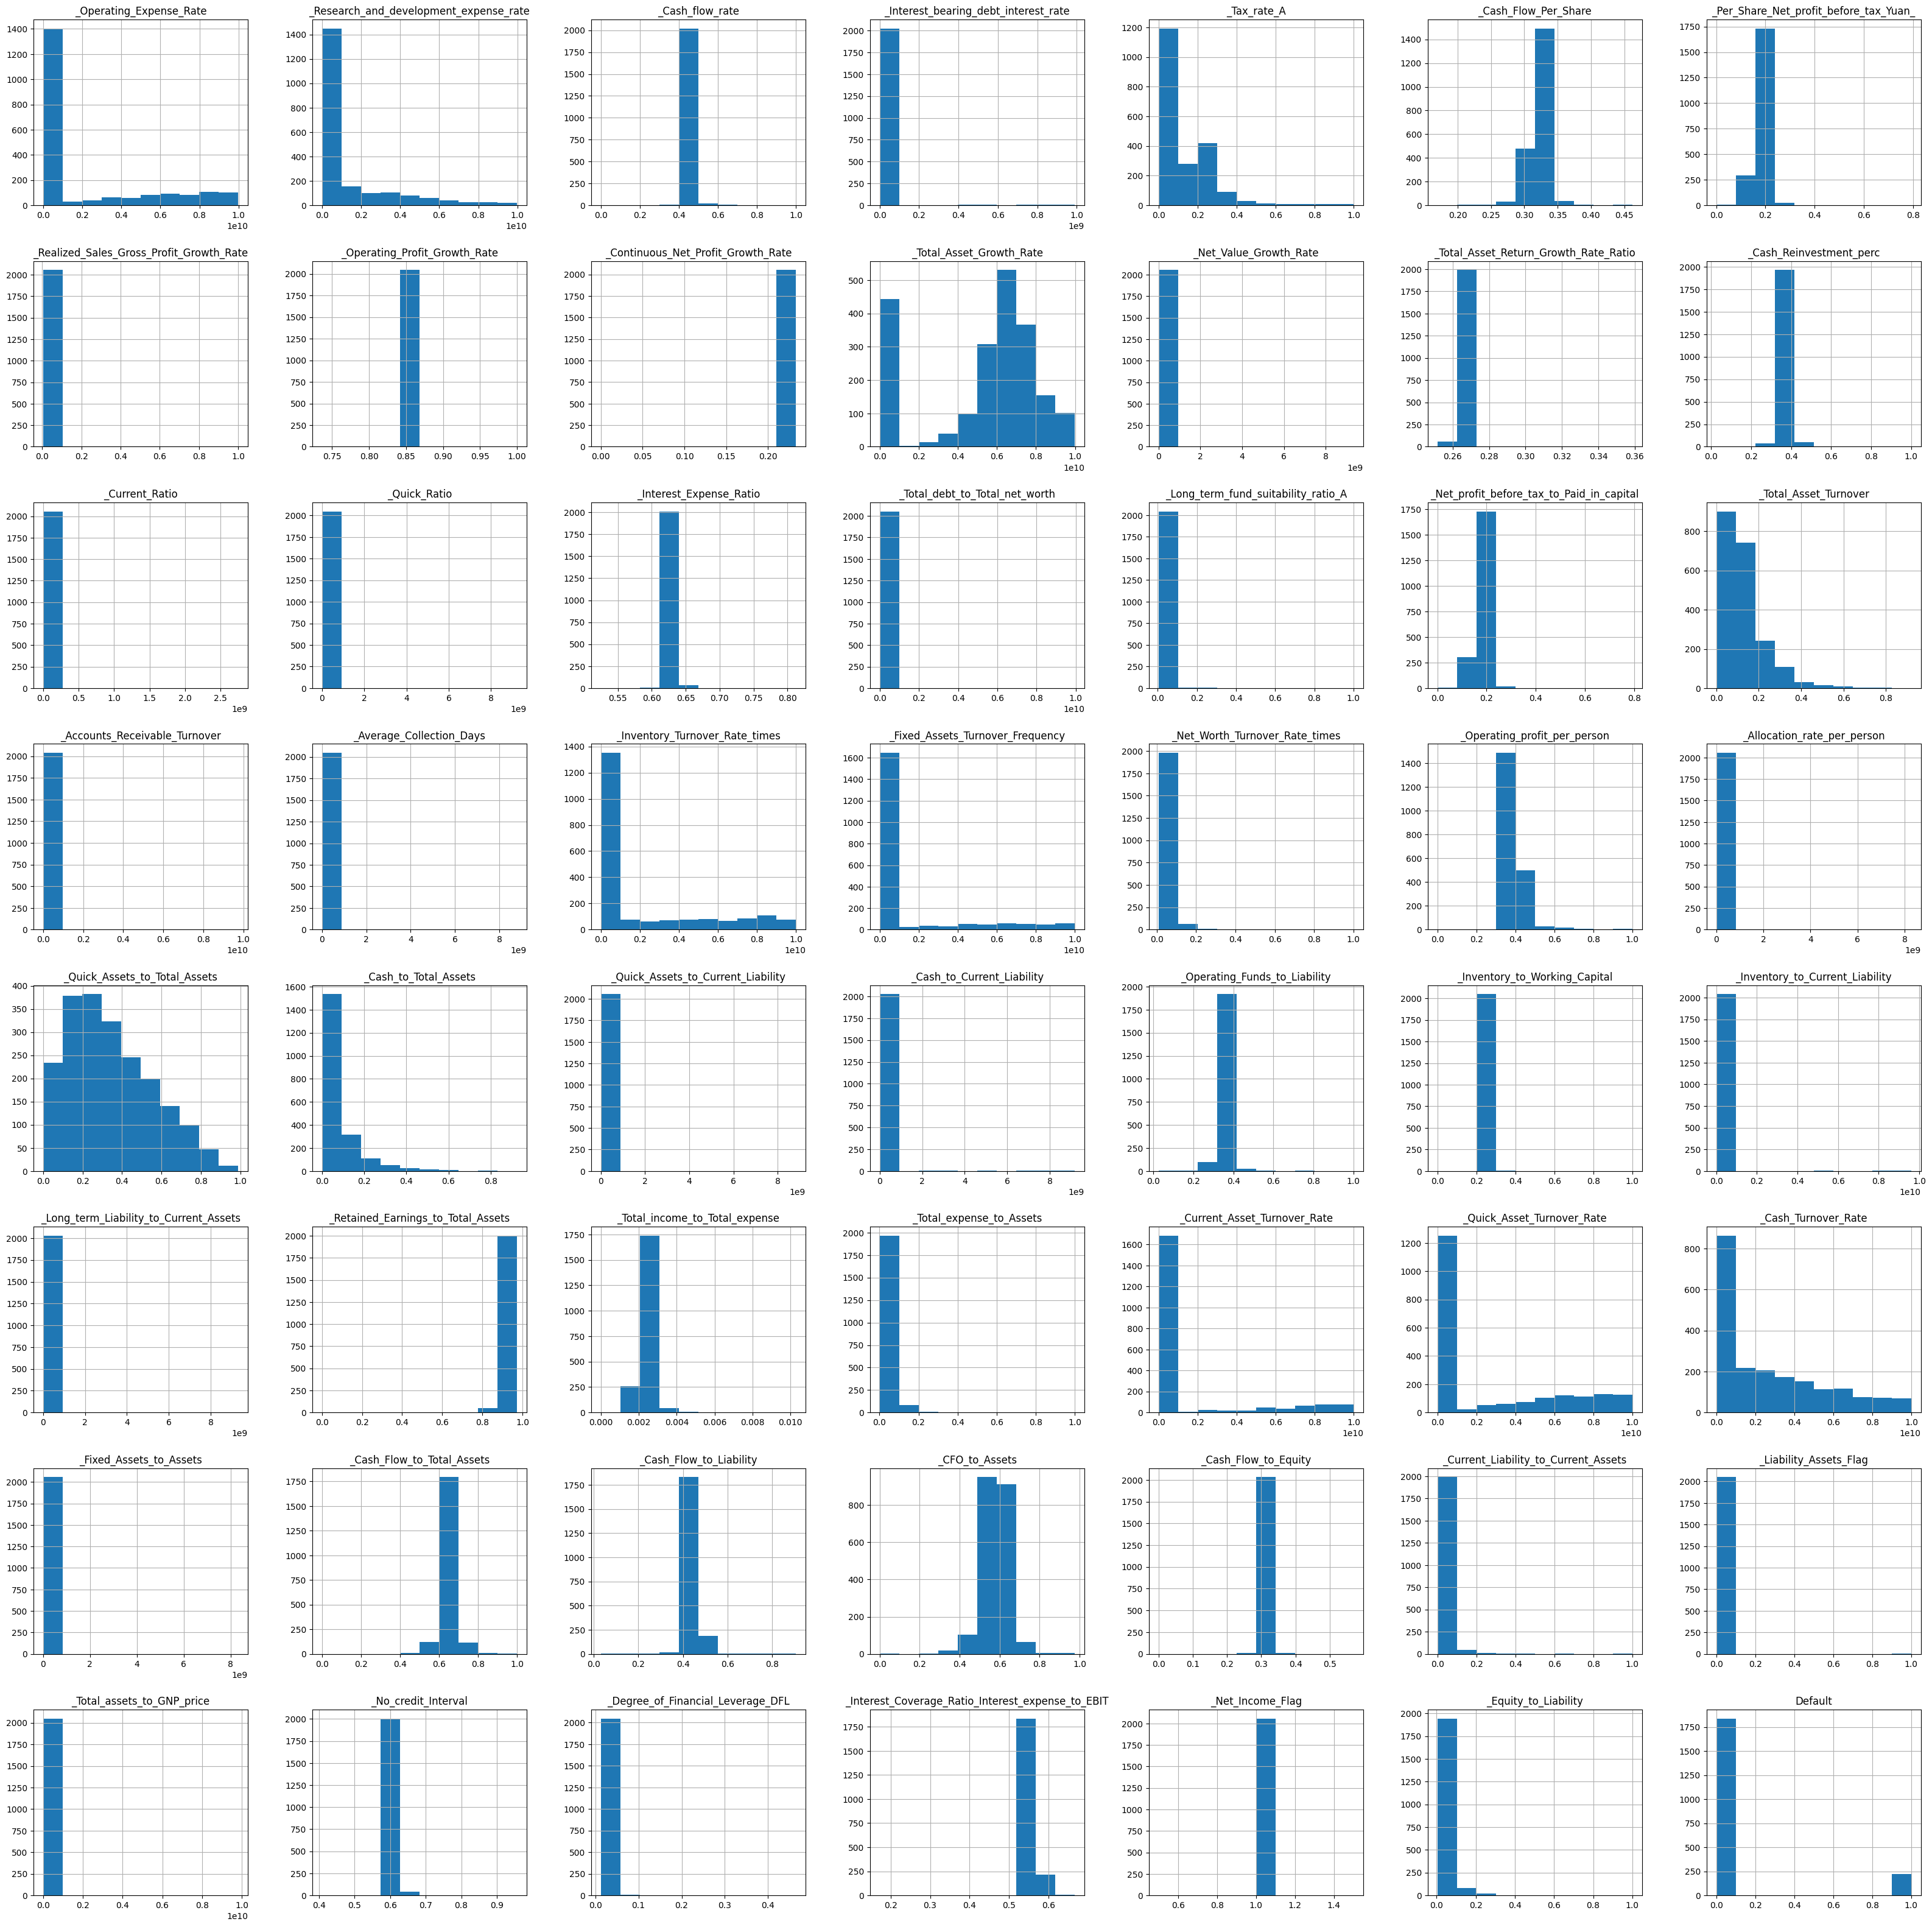

In [31]:
df.hist(figsize=(40,40));


In [32]:
import matplotlib.pyplot as plt        
import seaborn as sns 

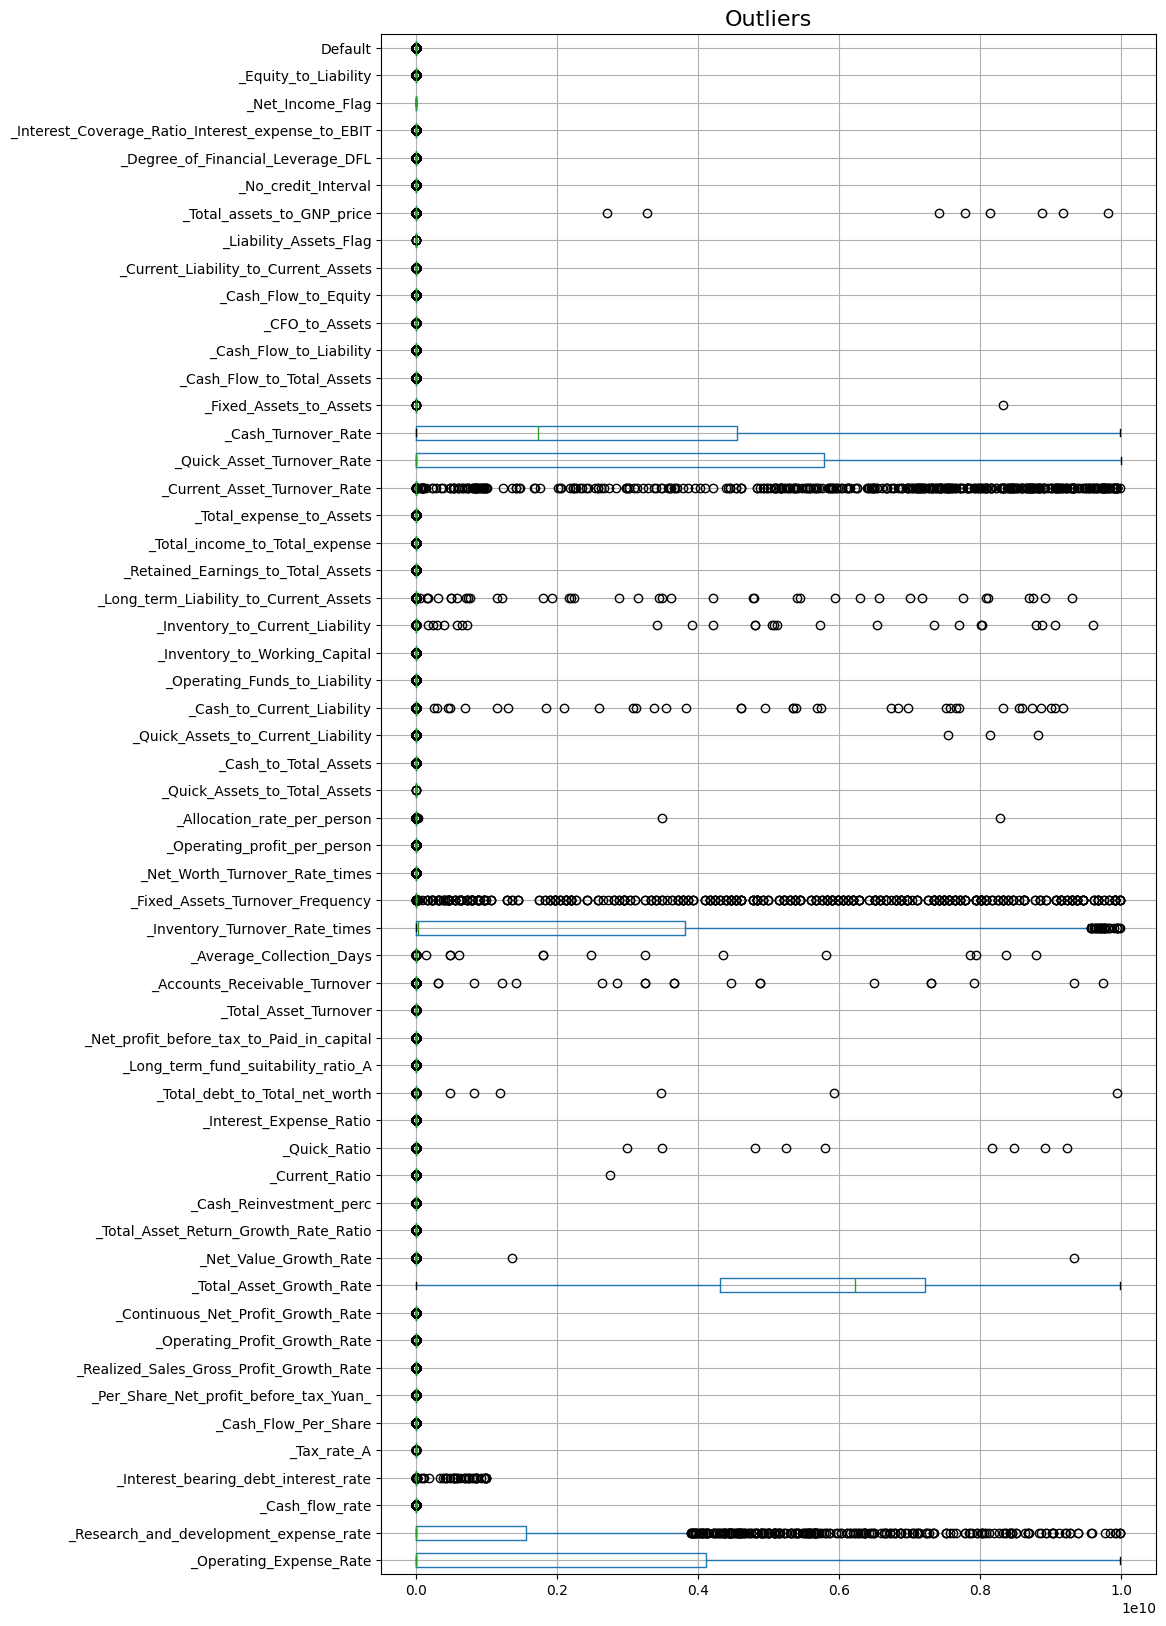

In [33]:
plt.figure(figsize=(10,20))
df.boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

Outlier Treatment

In [34]:
df_X = df.drop('Default', axis=1)
df_Y = df['Default']

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [36]:
for column in df_X.columns:
    lower_range,upper_range = remove_outlier(df_X[column])
    df_X[column]= np.where(df_X[column]>upper_range, upper_range ,df_X[column])
    df_X[column]= np.where(df_X[column]<lower_range, lower_range ,df_X[column])

In [37]:
df = pd.concat([df_X, df_Y], axis = 1)


In [38]:
import matplotlib.pyplot as plt        
import seaborn as sns 

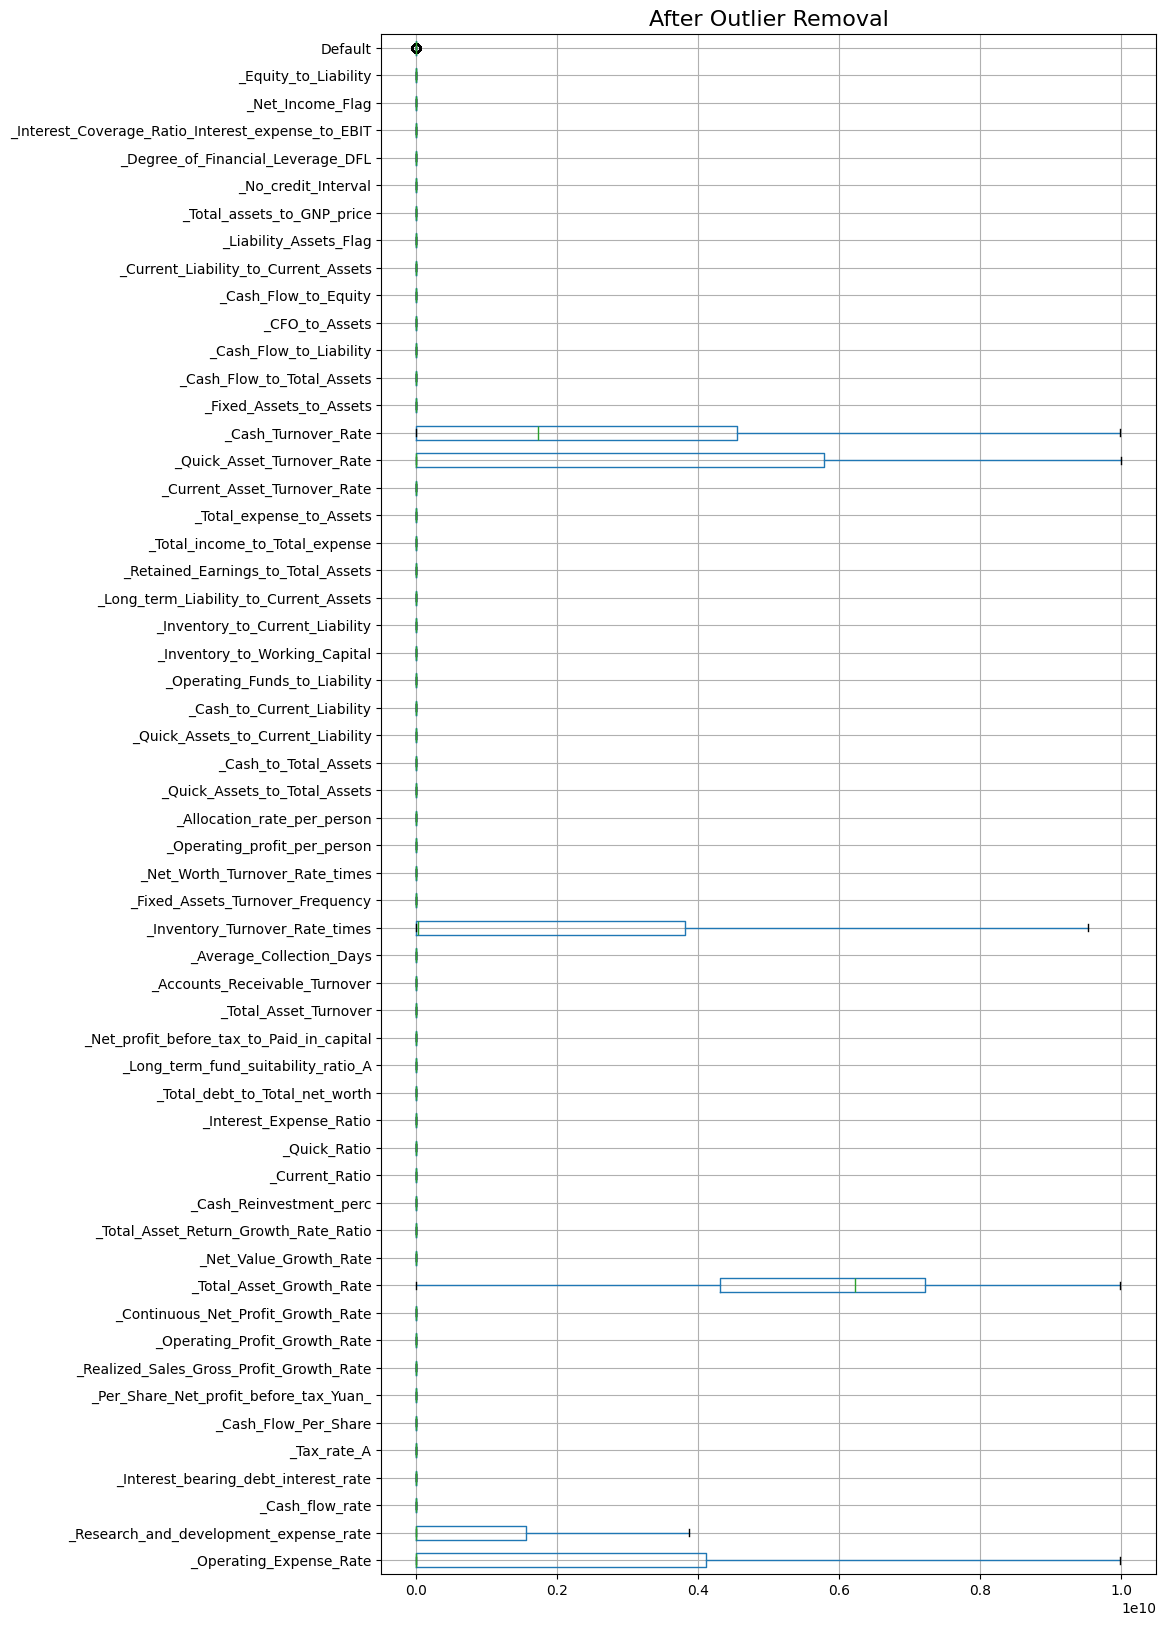

In [39]:
plt.figure(figsize=(10,20))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

Multivariate Analysis

In [40]:
import matplotlib.pyplot as plt        
import seaborn as sns 

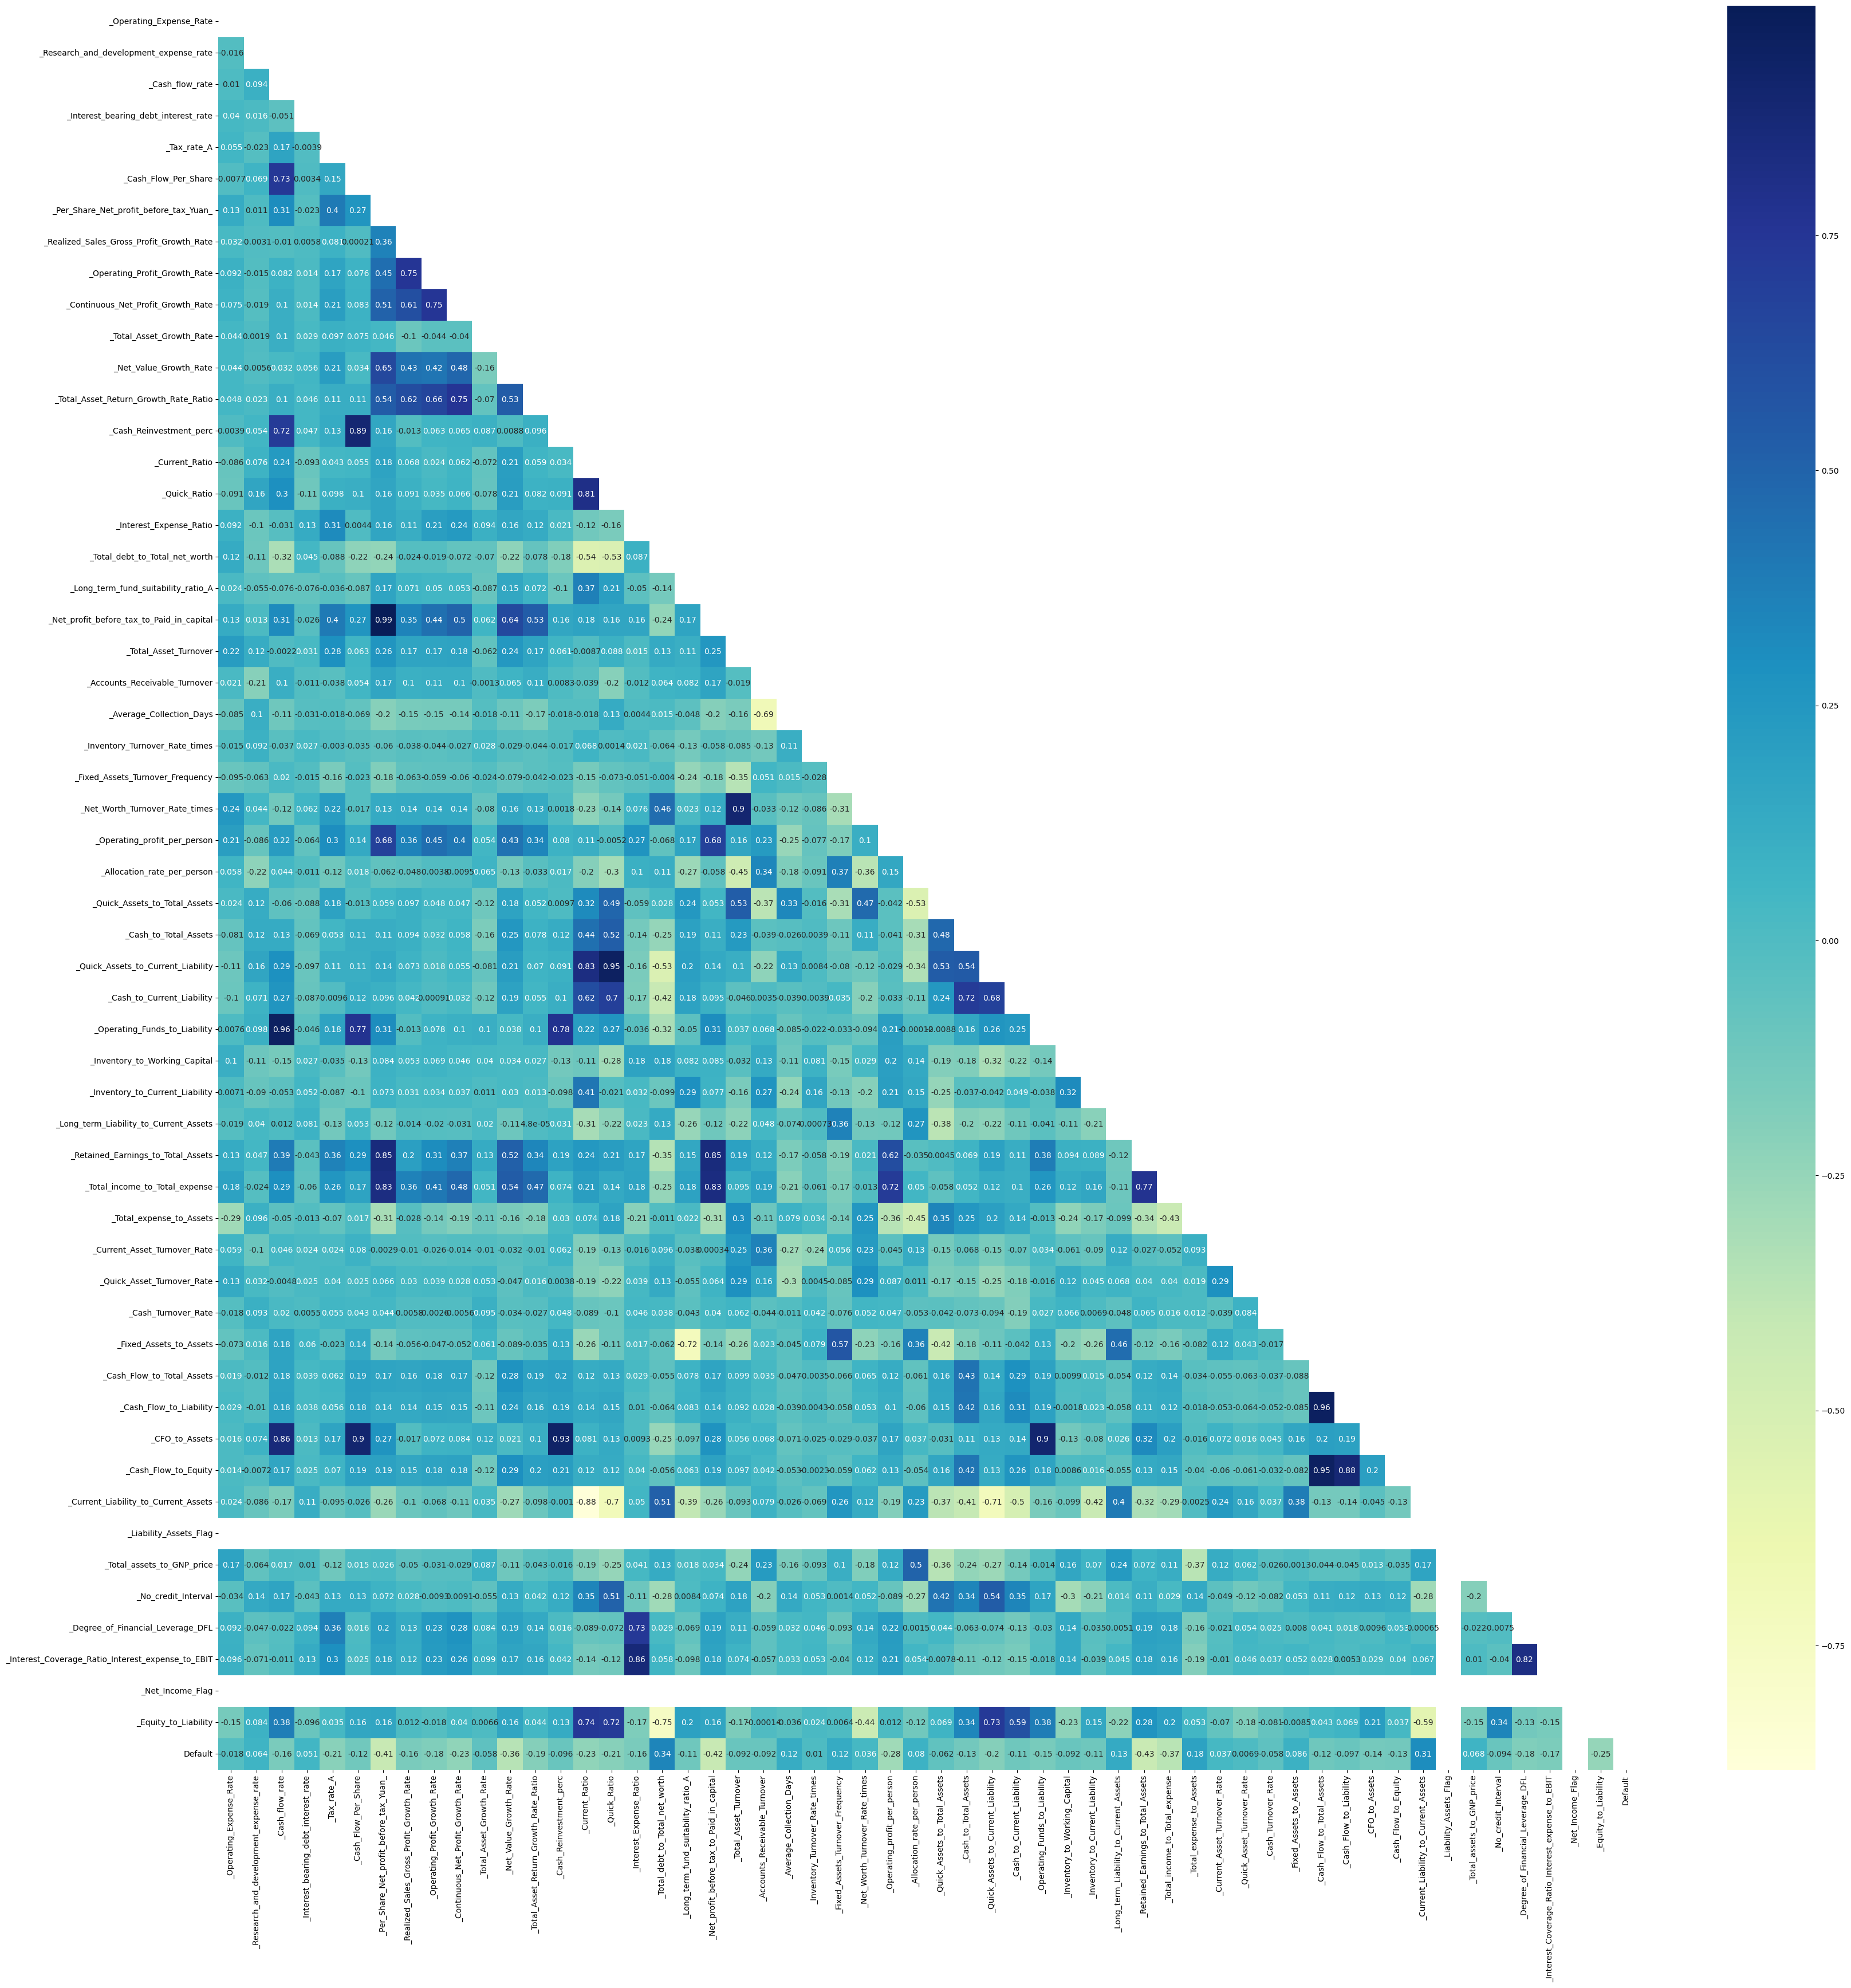

In [41]:
plt.figure(figsize = (40,40))
mask = np.triu(np.ones_like(df.corr()))
dfplot = sns.heatmap((df.corr()), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

We will continue to make colored scatter plot between significant variables only, post Logistic Regression Model making.